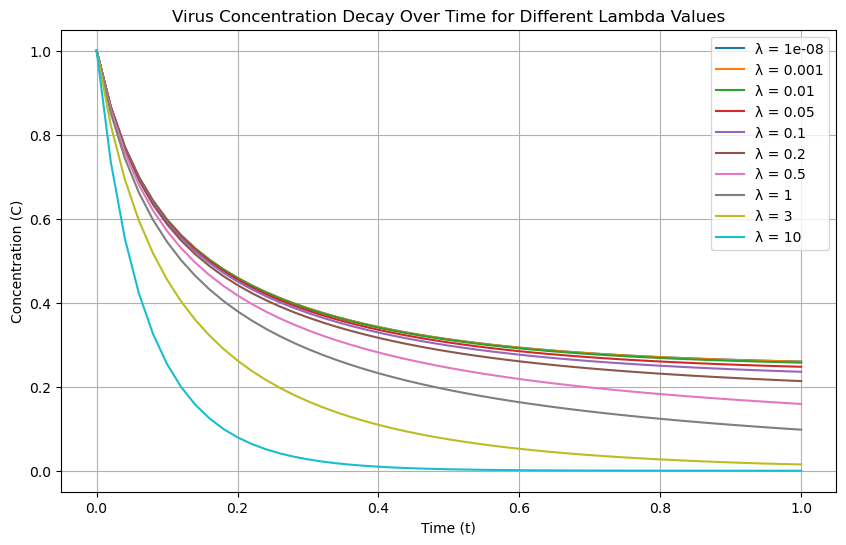

In [6]:
'''
This code considers the deactivation constant lambda and plots how different values of lambda affect how quickly the virus
dies in the air.
'''


import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1
Nx_spaces = 30
Nx_points = Nx_spaces + 1
x = np.linspace(0, L, Nx_points)
dx = x[1] - x[0]

T = 1
Nt_gaps = 50
Nt_points = Nt_gaps + 1
t = np.linspace(0, T, Nt_points)
dt = t[1] - t[0]
D = 0.1
C = D*dt/dx**2


# Different values of lambda to test
lambda_values = [0.00000001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 10]

# Compute concentration over time for each lambda
concentration_over_time = []

for lamda in lambda_values:
    C_lamda = lamda * dt
    concentration_values = []
    u_old = np.exp(-((x - 0.5) ** 2) / (2 * 0.1 ** 2))  # Gaussian initial condition
    A = np.zeros((Nx_points, Nx_points))
    b = np.zeros(Nx_points)

    # set up the matrix A
    for i in range(1, Nx_points - 1):
        A[i, i - 1] = -C
        A[i, i + 1] = -C
        A[i, i] = 1 + dt*lamda +2*C

    A[0,0] = 1+2*C  ; A[0,1]= -2*C 
    A[Nx_points-1,Nx_points-1] = 1+2*C 
    A[Nx_points-1,Nx_points-2] = -2*C

    for n in range(Nt_points):
        concentration_values.append(np.max(u_old))  # Maximum concentration at each time step
        b[:] = u_old[:]
        u_old = np.linalg.solve(A, b)

    concentration_over_time.append(concentration_values)

# Plotting concentration over time for different lambda values
plt.figure(figsize=(10, 6))
for i, lamda in enumerate(lambda_values):
    plt.plot(t, concentration_over_time[i], label=f'λ = {lamda}')
plt.xlabel('Time (t)')
plt.ylabel('Concentration (C)')
plt.title('Virus Concentration Decay Over Time for Different Lambda Values')
plt.legend()
plt.grid(True)
plt.show()